### --> Loading, Analysis and Visualization of the Dataset:


In [9]:
# Importing the libraries needed:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Reading the dataset for the crops:

crop = pd.read_csv("Crop_recommendation.csv")

In [11]:
# Fetching the first 5 dataframes of the 'crop' dataset:

crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
# Fetching the last 5 dataframes of the 'crop' dataset:

crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [13]:
# Shape and overall information about the crop dataset:

print('The shape of the dataset is: ', crop.shape)                  # --> It will fetch the total number of rows and columns available in the dataset and return it in the form of a tuple

print()

print(crop.info())                                                 # --> It will return a detailed informative view of the dataset

The shape of the dataset is:  (2200, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [14]:
# Analysing the missing values in the dataset:

crop.isnull()                                     # --> It will return a boolean dataframe having true/false values wherever the specified condition is valid

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [15]:
# We can apply the 'sum()' function to get overall idea about the total number of missing/null values in the dataset:

crop.isnull().sum()                      # --> It will return a dataframe having the 'columns of the dataset' as index and the the 'sum of null values' present in each column as values against the indices. 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
# Similarly we can also check for duplicate values in the dataset as:

print("Missing Values in Crop Dataset:", crop.duplicated().sum())                   # --> It will return the total no. of duplicates (if present) in the dataset as an output.

Missing Values in Crop Dataset: 0


In [17]:
# To check the statistics of the dataset:

crop.describe()                         # --> It will return a dataframe with the same columns as in the dataset and parameters such as count, mean min, etc as values in the columns.

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [18]:
# Checking the target feature distribution:

crop['label'].value_counts()             # --> It will return a dataframe with 'crop variety' as label and the number of occurences of each crop in the crop variety as values.

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [19]:
features = crop.columns.to_list()
features.remove("label")
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


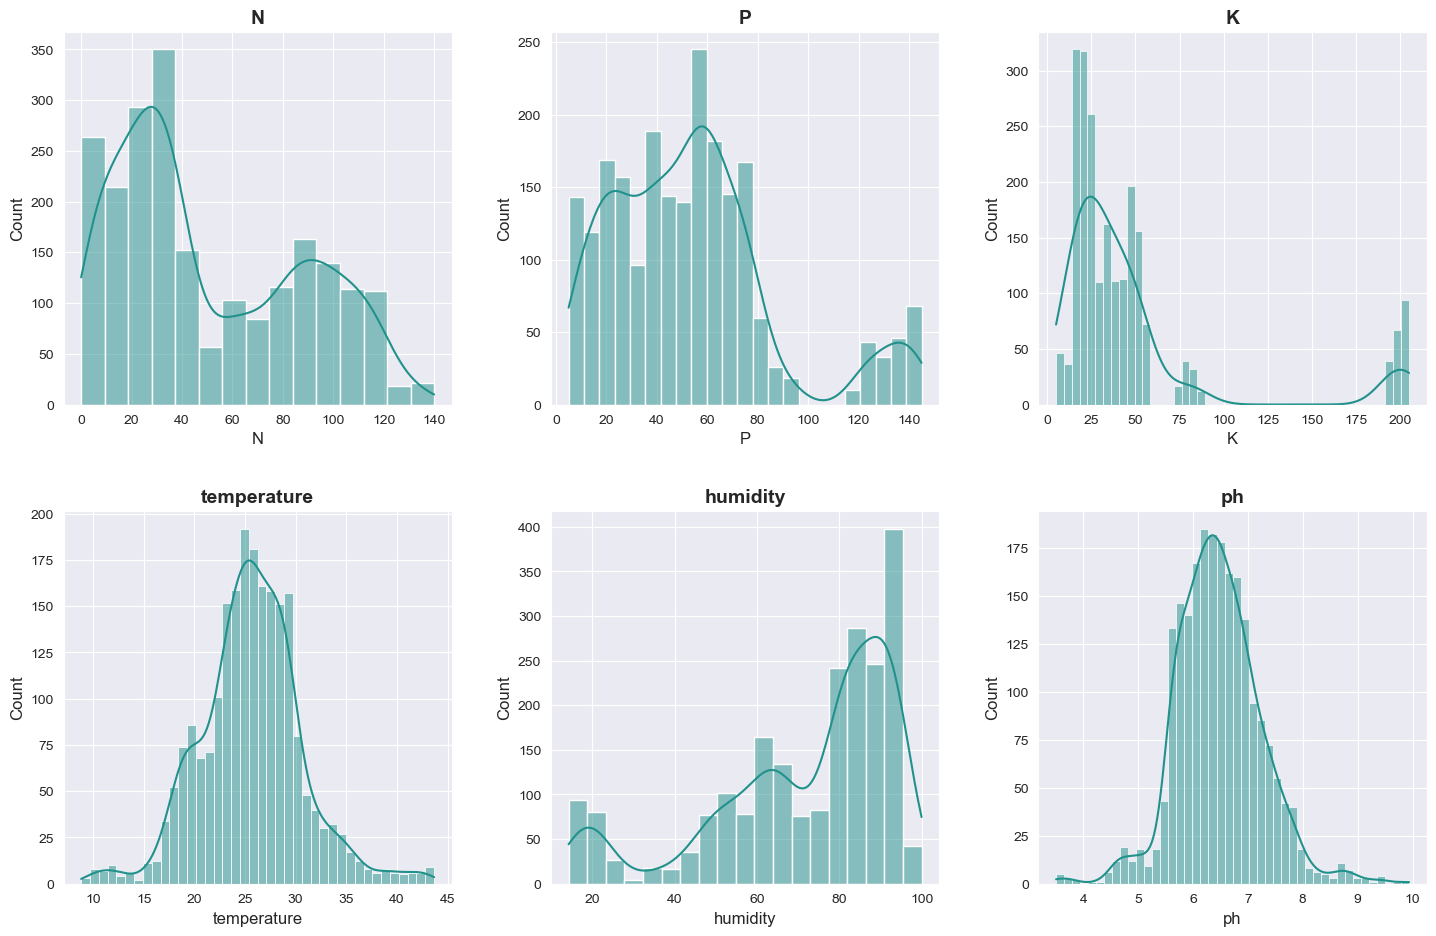

In [20]:
# Visualizing the distribution of each feature:

# Set a clean style:
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Create figure and subplots:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms:
for feature, ax in zip(features, axes.flat):
    sns.histplot(data=crop[feature], ax=ax, kde=True, color=plt.cm.viridis(0.5))
    ax.set_title(feature, fontsize=14, fontweight="bold")
    ax.set_xlabel(feature, fontsize = 12)
    ax.set_ylabel("Count", fontsize = 12)

# Adjust layout:
plt.tight_layout(pad=3)
plt.show()

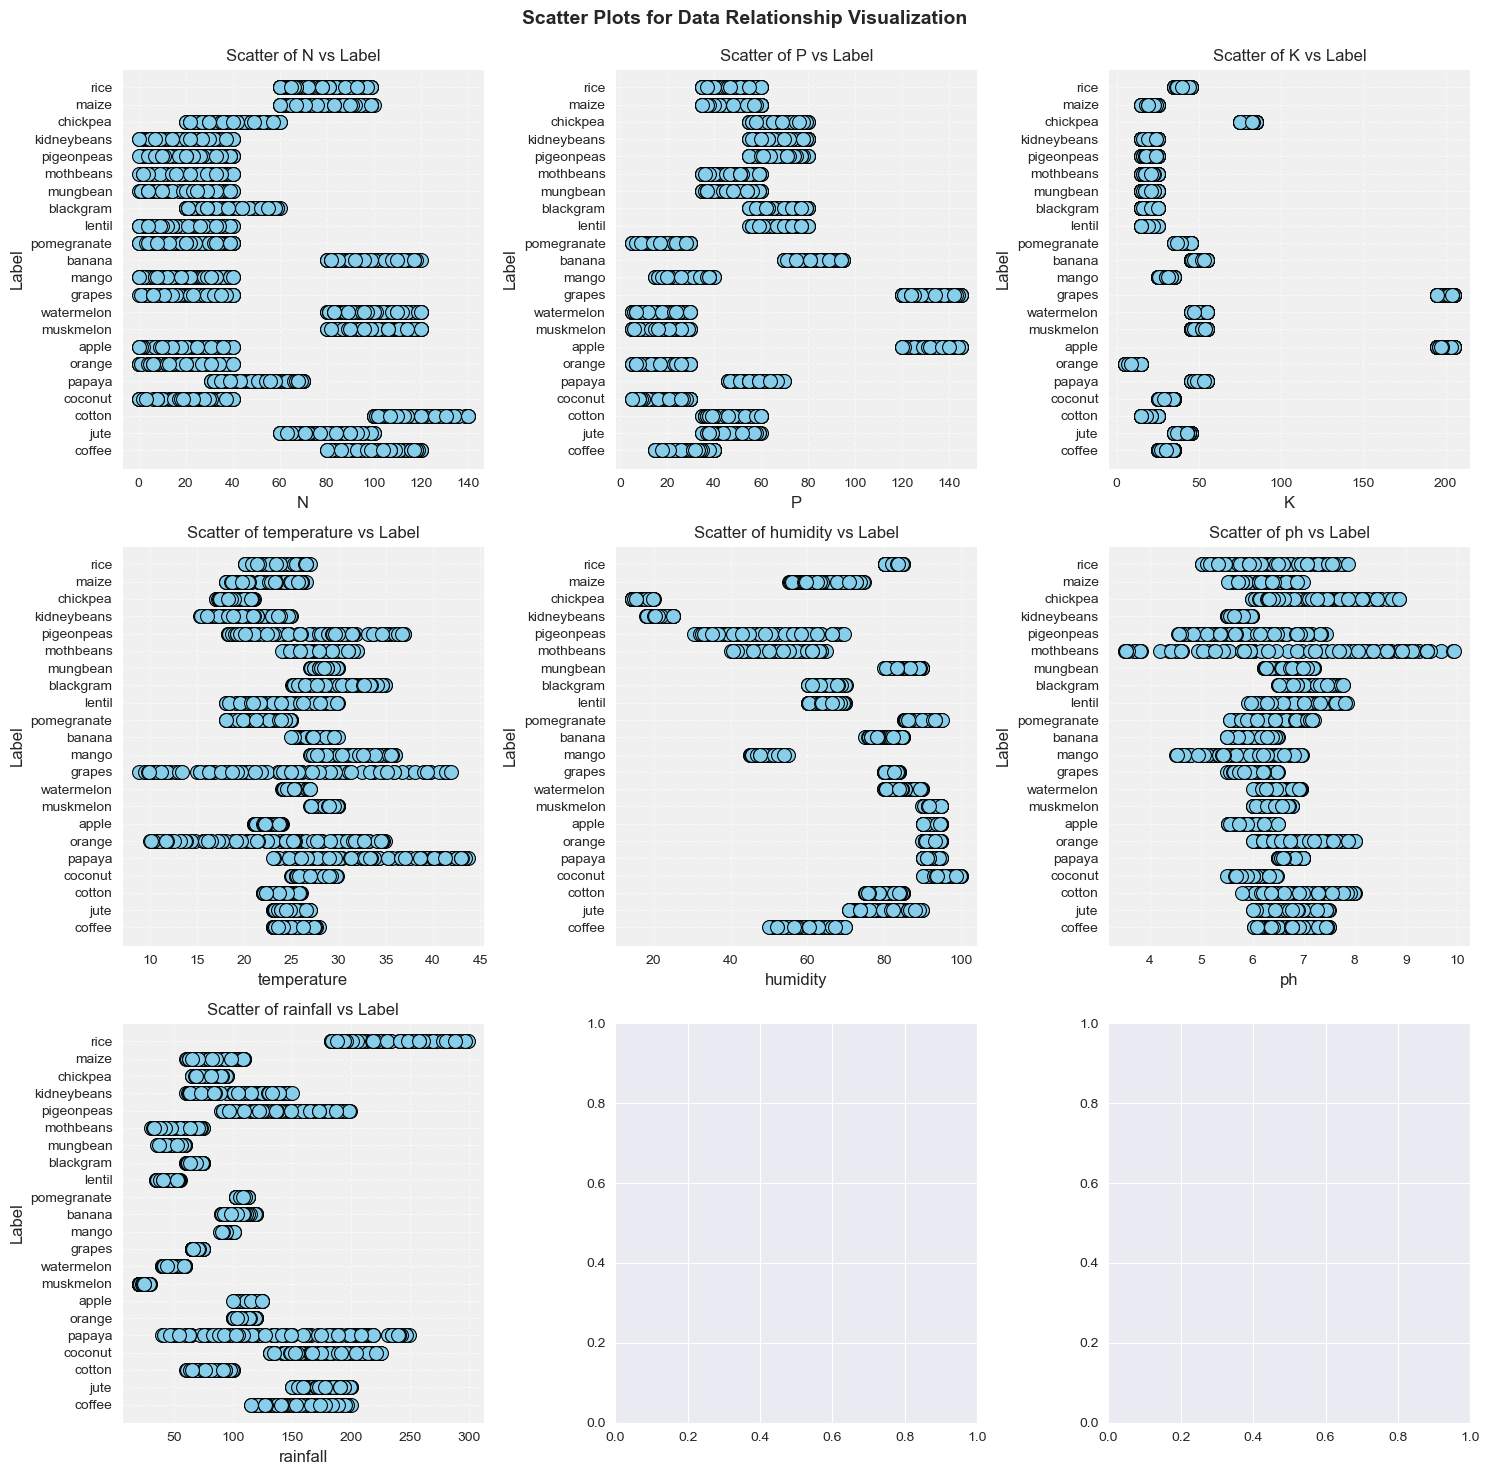

In [21]:
# Plotting the scatter plot:

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

fig.suptitle("Scatter Plots for Data Relationship Visualization\n", fontsize=14, fontweight='bold')

# Plot Scatter plots:
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot, color='skyblue', s=100, marker='o', edgecolor='black')
    
    # Customizing the titles and axis labels:
    subplot.set_title(f'Scatter of {i} vs Label', fontsize=12)
    subplot.set_xlabel(i, fontsize=12)
    subplot.set_ylabel('Label', fontsize=12)

    # Customizing grid and background:
    subplot.grid(True, linestyle='--', alpha=0.6)
    subplot.set_facecolor('#f0f0f0')

# Adjusting layout to avoid overlapping:
plt.tight_layout()

plt.show()

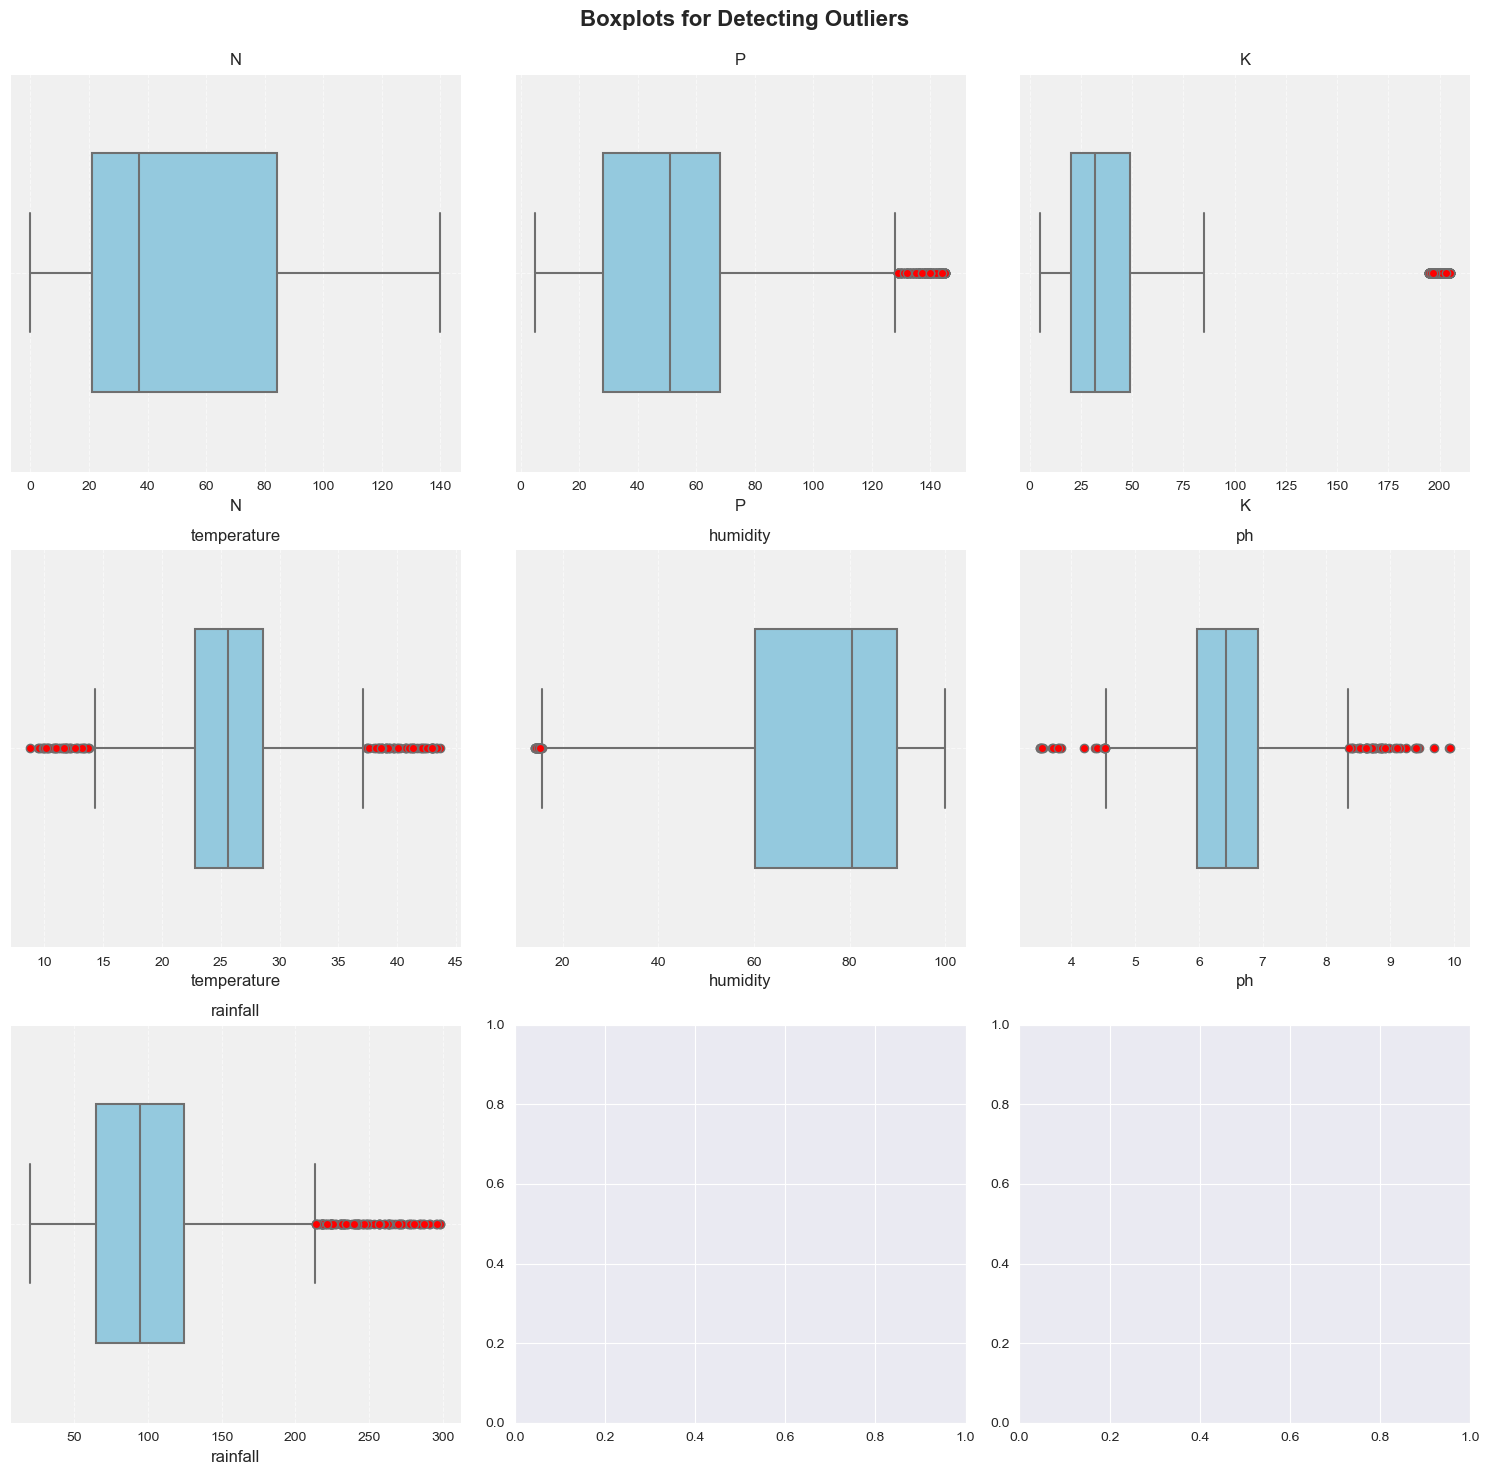

In [22]:
# Finding the outliers in the dataset by plotting the "boxplot":

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Boxplots for Detecting Outliers\n", fontsize=16, fontweight='bold')
print("")

# Plot Subplots:
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(x=crop[i], ax=subplot, color='skyblue', width=0.6, fliersize=6, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
  
    subplot.set_title(i, fontsize=12)
    subplot.set_xlabel(i, fontsize=12)

    subplot.grid(True, linestyle='--', alpha=0.6)
    subplot.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()

In [23]:
# Correlation of the features:

# Selecting only numerical columns from the dataset:
num_cols = crop.select_dtypes(include=[np.number])          # --> It'll filter out the columns with numerical data types only
print(num_cols)                                                    # --> It'll display the selected numerical columns

# Calculating the correlation matrix:
corr = num_cols.corr()                                      # --> Computes the correlation between numerical features in the dataset
corr                                                        # --> Display the correlation matrix

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


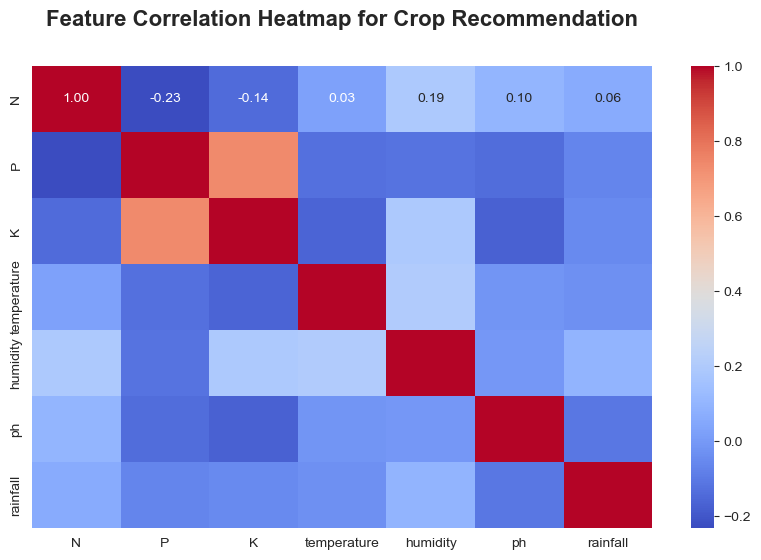

In [24]:
# Visualizing the correlation with Heatmap:

plt.figure(figsize=(10, 6))                                    # --> Set the figure size for better readability

sns.heatmap(corr, annot=True, fmt = '0.2f', cmap='coolwarm')  # --> This'll generate the heatmap with correlation values
plt.title("Feature Correlation Heatmap for Crop Recommendation\n", fontsize=16, fontweight='bold', pad=12)

plt.show()

### Encoding:

In [26]:
crop['label'].nunique()                     # It'll return the number of unique values in the 'label' column

22

In [27]:
# Creating a dictionary to map crop names to numerical values:

crop_dict = {
    'rice': 0,
    'maize': 1,
    'chickpea': 2,
    'kidneybeans': 3,
    'pigeonpeas': 4,
    'mothbeans': 5,
    'mungbean': 6,
    'blackgram': 7,
    'lentil': 8,
    'pomegranate': 9,
    'banana': 10,
    'mango': 11,
    'grapes': 12,
    'watermelon': 13,
    'muskmelon': 14,
    'apple': 15,
    'orange': 16,
    'papaya': 17,
    'coconut': 18,
    'cotton': 19,
    'jute': 20,
    'coffee': 21
}

In [28]:
# Mapping crop names to numerical values using crop_dict:

crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [29]:
# Dropping the 'label' column as it has been converted into numerical values:

crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,21


### --> Splitting:

In [31]:
# Train test split:

X = crop.drop('crop_no', axis = 1)
y = crop['crop_no']

print(X.shape)
print(y.shape)

(2200, 7)
(2200,)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"The shape of x_train is: {X_train.shape}")
print(f"The shape of x_test is: {X_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (1760, 7)
The shape of x_test is: (440, 7)
The shape of y_train is: (1760,)
The shape of y_test is: (440,)


### --> Scaling:

In [34]:
# Scale the features using StandardScaler:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### --> Model Training:

In [36]:
print(crop.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop_no        0
dtype: int64


In [37]:
# Training the model:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = dtc.predict(X_test_scaled)
acs = accuracy_score(y_test, y_pred)
print('Accuracy score for testing dataset is:', acs)

Accuracy score for testing dataset is: 0.9863636363636363


In [39]:
y_pred_train = dtc.predict(X_train_scaled)
acs_train = accuracy_score(y_train, y_pred_train)
print('Accuracy score for training dataset is:', acs_train)

Accuracy score for training dataset is: 1.0


### --> Prediction:

In [41]:
# Prediction:

crop_dict = {
    0: 'rice',
    1: 'maize',
    2: 'chickpea',
    3: 'kidneybeans',
    4: 'pigeonpeas',
    5: 'mothbeans',
    6: 'mungbean',
    7: 'blackgram',
    8: 'lentil',
    9: 'pomegranate',
    10: 'banana',
    11: 'mango',
    12: 'grapes',
    13: 'watermelon',
    14: 'muskmelon',
    15: 'apple',
    16: 'orange',
    17: 'papaya',
    18: 'coconut',
    19: 'cotton',
    20: 'jute',
    21: 'coffee'
}

def crop_rec(N, P, K, temp, hum, ph, rain):
    features = np.array([[N, P, K, temp, hum, ph, rain]])
    transformed_features = scaler.transform(features)
    prediction = dtc.predict(transformed_features).reshape(1, -1)    
    crop = [crop_dict[i] for i in prediction[0]]

    return f"{crop} is a best crop according to the given conditions"

In [42]:
# Predicting with the values:

N = 90
P = 45
K = 43
temp = 20
hum = 82
ph = 6.1
rain = 202

crop_rec(N, P, K, temp, hum, ph, rain)

"['rice'] is a best crop according to the given conditions"

In [43]:
# Predicting with the values:
# 107	34	32	26.774637	66.413269	6.780064	177.774507
N = 107
P = 34
K = 32
temp = 26.774637
hum = 66.413269
ph = 6.780064
rain = 177.774507

crop_rec(N, P, K, temp, hum, ph, rain)


"['coffee'] is a best crop according to the given conditions"

In [44]:
import pickle 

with open("crop_model.pkl", "wb") as f:
    pickle.dump(dtc, f)

with open("crop_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [2]:
# Required numpy and sklearn version for this project:

import numpy as np
import pandas as pd
import sklearn

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 1.26.4
Pandas version: 2.1.4
Scikit-learn version: 1.6.1
